Data Mining and Visualisation 2019-2020 <br>
Practical 2 - K-means Clustering <br>
Teaching Assistant Muhammad Usman <br>

# INTRODUCTION <br>

In this exercise, you are expected to write a Python code to implement the k-means algorithm. You can write you own code to implement the algorithm detailed in the lecture; you can also use existing software packages to implement the algorithm.

# Hint <br>

Useful for Assessment 1

Some code has been provided already.
Solution will be uploaded as well.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
from sklearn.cluster import KMeans

from google.colab import files


# Step 1
Download the file kmeans.csv from blackboard. There are two attributes in the data.

In [0]:
def get_data():
    # complete - load the data
    data = pd.read_csv(io.StringIO(files.upload()['kmeans.csv'].decode('utf-8')))
  
    # complete - shuffle data rows
    return data

def shuffle_data(data):
    return data.sample(frac=1).reset_index(drop=True)


In [4]:
data = get_data()
data.head()

Saving kmeans.csv to kmeans.csv


,1.814723686,1.162182308
0,1.905792,1.794285
1,1.126987,1.311215
2,1.913376,1.528533
3,1.632359,1.165649
4,1.097540,1.601982


# Step 2
Show the scatter plots of the data; you will see that there are three clusters.


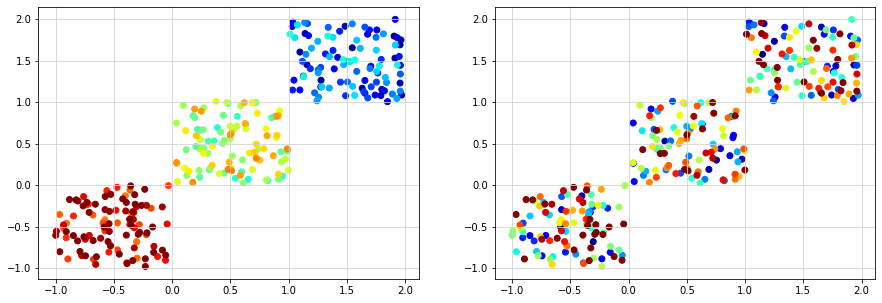

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
for i, dat in enumerate([data, shuffle_data(data)]):
    axes[i].scatter(dat.iloc[:, 0], dat.iloc[:, 1], color=plt.cm.jet(data.index))
    axes[i].grid(color='lightgrey')
plt.show()


In [6]:
data = shuffle_data(data)
data.head()

,1.814723686,1.162182308
0,0.708746,0.394619
1,0.240488,0.658991
2,-0.763769,-0.251294
3,1.694829,1.869292
4,-0.712502,-0.328736


# Steps 3-4
3) Write a Python code to implement the k-means algorithm on the data. You can use the Python module sklearn to import the k-means algorithm, for example, `from sklearn.cluster import KMeans’.

4) Try to write a Python code to implement the k-means algorithm introduced in the Lecture. This is also needed for the assessment.


In [0]:
def kmeans_clustering(data, K):
    # complete - define the model
    model = KMeans(n_clusters=K)

    # complete - fit the model to data
    model.fit(data)
    centroid = model.cluster_centers_
    labels = model.labels_
    
    distance = model.inertia_
    cluster_set = {}
    for i,x in enumerate(data):
        xlabel = labels[i]
        if xlabel not in cluster_set.keys():
            cluster_set[xlabel] = np.reshape(x,(1,len(x)))
        else:
            cluster_set[xlabel] = np.append(cluster_set[xlabel],np.reshape(x,(1,len(x))), axis=0)
    return centroid, distance, cluster_set


In [27]:
K = 3
centroids, distances, clusters_set = kmeans_clustering(data.values, K)
centroids


array([[ 1.52509821,  1.47053719],
       [-0.50711609, -0.49896438],
       [ 0.51444445,  0.48830737]])

In [33]:
clusters_set.keys()

dict_keys([2, 1, 0])

# Step 5
Visualise the scatter plot clusters with different colours and their centroids.

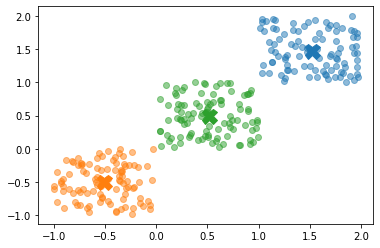

In [35]:
plt.figure()
for i, key in enumerate(sorted(clusters_set.keys())):
    cluster = clusters_set[key]
    plt.scatter(cluster[:,0],cluster[:,1],alpha=0.5)#,cmap=matplotlib.colors.ListedColormap(colors[plt.scatter(centroid[key][0],centroid[key][1],alpha=1)#,cmap=matplotlib.colors.ListedColormap(# choose the number of clusters
    plt.plot(*tuple(centroids[i]), 'X', ms=15)

plt.show()


# Step 6
Optimal number of clusters: The number of clusters has to be provided before applying k-means algorithm to the data. However, we do not know the optimal number of clusters corresponding to this data. To find the optimal number of clusters, we can optimise the aggregate distance over all the data. Therefore, to find the optimal number, your task is to do the following:

  a) vary the number of clusters K from 1 to 10, and apply k-means to the data for each K;

  b) calculate the aggregate distance for each K;

  c) visualise the aggregate distance against K;

  d) select the optimal K where _mountain_ ends and _rubbles_ begins.


In [0]:
def agg_distance(data):
    distances = np.zeros((2, 10))
    for i in range(distances.shape[1]):
        distances[0, i] = i + 1
        distances[1, i] = kmeans_clustering(data.values, i+1)[1]
    return distances

Text(0, 0.5, 'aggregate distance')

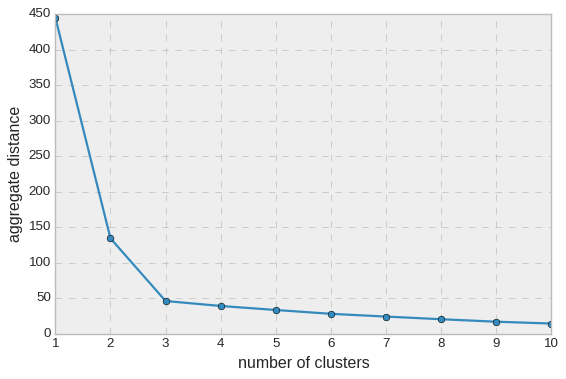

In [58]:
plt.style.use('bmh')

all_distances = agg_distance(data)
fig, axes = plt.subplots(figsize=(8, 5))
axes.plot(all_distances[0], all_distances[1], marker='o')
axes.set_xlabel('number of clusters')
axes.set_ylabel('aggregate distance')
